In [1]:
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
import pandas as pd
data_train = pd.read_parquet('../data/processed/train.gzip')

for col in ['CO_TIPO_SEXO', 'ANIO_BANCARIZACION', 'MES_BANCARIZACION']:
    data_train[col] = data_train[col].astype('category')

In [3]:
data_train.dtypes

ID                                           object
TARGET                                        int64
CO_TIPO_SEXO                               category
EDAD                                        float64
ANIO_BANCARIZACION                         category
MES_BANCARIZACION                          category
CANT_EMP_NEG_max                              int64
CANT_EMP_NEG_last                             int64
CANT_EMP_CONS_max                             int64
CANT_EMP_CONS_last                            int64
CANT_EMP_HIPOT_max                            int64
CANT_EMP_HIPOT_last                           int64
VAR_SALDO_EMP_TOTAL_1_mean                  float64
VAR_SALDO_EMP_TOTAL_1_median                float64
VAR_SALDO_EMP_TOTAL_MA3_mean                float64
VAR_SALDO_EMP_TOTAL_MA3_median              float64
VAR_SALDO_EMP_TOTAL_MA6_mean                float64
VAR_SALDO_EMP_TOTAL_MA6_median              float64
VAR_SALDO_EMP_TOTAL_MA8_mean                float64
VAR_SALDO_EM

In [4]:
# get only numeric columns
data = data_train.select_dtypes(include=['int64', 'float64'])# pd.concat([data_train.select_dtypes(include=['int64', 'float64']), data_train['ID']], axis=1)


TARGET_VAR = 'TARGET'

# perform min max normalization in all columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled[TARGET_VAR] = data_train[TARGET_VAR]
data_scaled.head(36)

,TARGET,EDAD,CANT_EMP_NEG_max,CANT_EMP_NEG_last,CANT_EMP_CONS_max,CANT_EMP_CONS_last,CANT_EMP_HIPOT_max,CANT_EMP_HIPOT_last,VAR_SALDO_EMP_TOTAL_1_mean,VAR_SALDO_EMP_TOTAL_1_median,...,PROXY_MOROSIDAD_1_min,PROXY_MOROSIDAD_1_median,PROXY_MOROSIDAD_2_mean,PROXY_MOROSIDAD_2_max,PROXY_MOROSIDAD_2_min,PROXY_MOROSIDAD_2_median,PROXY_MOROSIDAD_3_mean,PROXY_MOROSIDAD_3_max,PROXY_MOROSIDAD_3_min,PROXY_MOROSIDAD_3_median
0,1,0.488636,0.1,0.1,0.142857,0.111111,0.000000,0.000000,0.000836,0.999176,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0,0.306818,0.1,0.1,0.000000,0.000000,0.000000,0.000000,0.000304,0.999177,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1,0.181818,0.0,0.0,0.071429,0.111111,0.333333,0.333333,0.000344,0.999178,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0,0.284091,0.0,0.0,0.357143,0.444444,0.000000,0.000000,0.000345,0.999178,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0,0.352273,0.2,0.2,0.000000,0.000000,0.000000,0.000000,0.000319,0.999178,...,0.939554,0.0,1.262936e-07,1.136642e-06,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0,0.500000,0.1,0.1,0.000000,0.000000,0.000000,0.000000,0.000323,0.999177,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0,0.318182,0.1,0.1,0.000000,0.000000,0.000000,0.000000,0.000515,0.999178,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0,0.409091,0.1,0.1,0.142857,0.222222,0.000000,0.000000,0.000328,0.999177,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0,0.465909,0.0,0.0,0.142857,0.111111,0.000000,0.000000,0.000345,0.999178,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0,0.313482,0.0,0.0,0.142857,0.222222,0.000000,0.000000,0.000345,0.999178,...,0.939554,0.0,0.000000e+00,0.000000e+00,0.137434,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
# variable selection with PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)
# data_pca = pca.fit_transform(data_scaled.drop(TARGET_VAR, axis=1))
# data_pca = pd.DataFrame(data_pca)
# data_pca[TARGET_VAR] = data_scaled[TARGET_VAR]
# data_pca.head(36)

In [6]:
from pycaret.classification import *
s = setup(data_scaled, target=TARGET_VAR, session_id=123, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,123
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(91183, 52)"
4,Transformed data shape,"(91183, 52)"
5,Transformed train set shape,"(63828, 52)"
6,Transformed test set shape,"(27355, 52)"
7,Numeric features,51
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1650 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [7]:
# from pycaret.classification import ClassificationExperiment
# exp = ClassificationExperiment()
# exp.setup(data_pca, target=TARGET_VAR, session_id=123, use_gpu=True)
# exp.compare_models()

In [8]:
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8637,0.7690,0.2249,0.6277,0.3310,0.2736,0.3188,0.6010
lightgbm,Light Gradient Boosting Machine,0.8652,0.7772,0.2155,0.6545,0.3241,0.2699,0.3220,0.7770
catboost,CatBoost Classifier,0.8660,0.7772,0.2125,0.6673,0.3223,0.2694,0.3244,3.6580
rf,Random Forest Classifier,0.8604,0.7426,0.2016,0.6037,0.3021,0.2455,0.2917,3.0880
et,Extra Trees Classifier,0.8548,0.7233,0.2095,0.5422,0.3020,0.2384,0.2723,3.6660
dt,Decision Tree Classifier,0.7808,0.5793,0.3066,0.2853,0.2956,0.1660,0.1661,1.9560
gbc,Gradient Boosting Classifier,0.8622,0.7561,0.1746,0.6518,0.2753,0.2263,0.2874,25.2400
nb,Naive Bayes,0.1587,0.5038,0.9947,0.1508,0.2618,0.0018,0.0209,0.0930
knn,K Neighbors Classifier,0.8439,0.6456,0.1806,0.4492,0.2574,0.1876,0.2122,1.0700
ada,Ada Boost Classifier,0.8586,0.7443,0.1537,0.6140,0.2457,0.1976,0.2565,4.8050


In [9]:
# tuned_model = tune_model(best, optimize='F1 Macro')

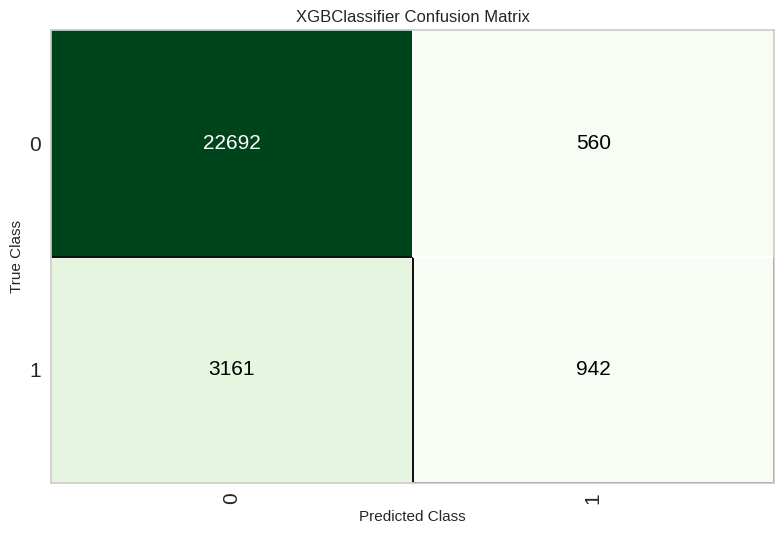

In [10]:
plot_model(best, plot='confusion_matrix')

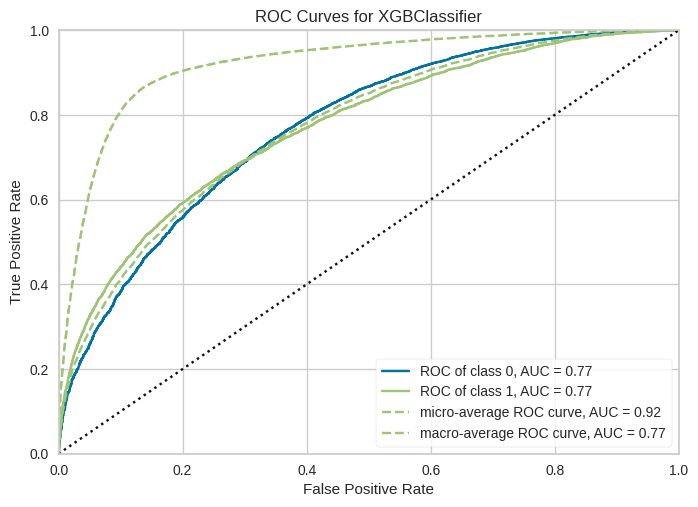

In [11]:
plot_model(best, plot='auc')

In [12]:
# predictions = predict_model(best, data=new_data)